# Homework 2 (Solution)

## Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

# Preparing the dataset 


Only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# data 
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

print('# rows: ' +  str(len(df)))

# keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

print('# rows after subset: ' +  str(len(df)))

# rows: 20640
# rows after subset: 15687


In [3]:
# only include the columns specified above
df = df.drop('ocean_proximity', axis = 1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


Pace, R. Kelley and Ronald Barry published their work using this dataset in the Statistics and Probability Letters journal. The dataset was built using the 1990 California census data and contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

## Exploratory Data Analysis

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,15687.0,-119.217442,1.780380,-124.1400,-121.0700,-118.3700,-117.9900,-114.3100
latitude,15687.0,35.467307,2.066387,32.6100,33.9400,34.1600,37.3400,41.9500
housing_median_age,15687.0,27.188118,12.057128,1.0000,17.0000,27.0000,36.0000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,1441.0000,2118.0000,3172.0000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,295.0000,432.0000,645.0000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,802.0000,1195.0000,1777.0000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,278.0000,406.0000,602.0000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,2.5208,3.4688,4.6862,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,111300.0000,166900.0000,241100.0000,500001.0000


In [5]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
818

latitude
[37.64 37.61 37.57 37.58 37.49]
834

housing_median_age
[32.  9. 21. 15. 20.]
52

total_rooms
[1283. 3666. 4342. 3575. 4126.]
5428

total_bedrooms
[ 194.  711.  783.  597. 1031.]
1822

population
[ 485. 2341. 2172. 1777. 2079.]
3683

households
[171. 703. 789. 559. 975.]
1707

median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
10434

median_house_value
[431000. 217000. 247600. 283500. 216900.]
3493



### Median House Price (Y)

[Text(0.5, 0, 'Median House Price'),
 Text(0.5, 1.0, 'Histogram of Median House Prices in California for 1990')]

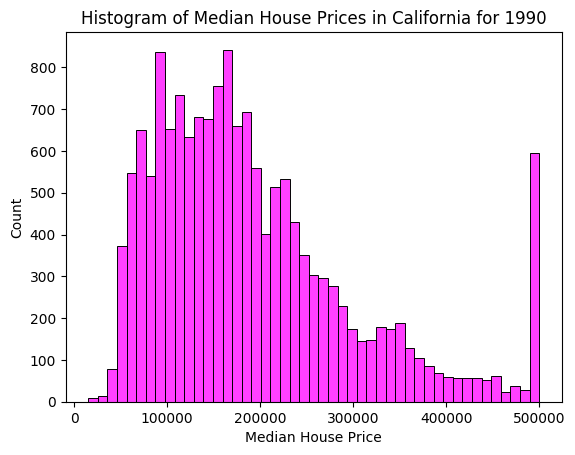

In [6]:
ax = sns.histplot(df.median_house_value, color='magenta')
ax.set(xlabel = 'Median House Price', title = 'Histogram of Median House Prices in California for 1990')

[Text(0.5, 1.0, 'Median House Price by Census Block in California, 1990')]

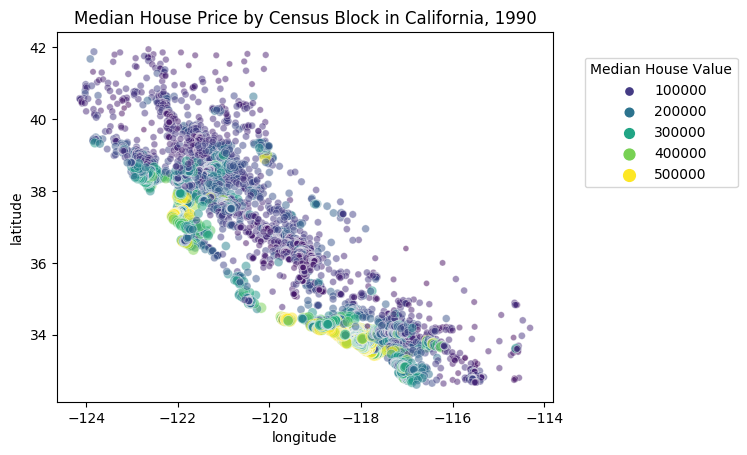

In [7]:
# longitude and latitude
ax = sns.scatterplot(
    data = df,
    x = "longitude",
    y = "latitude",
    size = "median_house_value",
    hue = "median_house_value",
    palette = "viridis",
    alpha = 0.5,
)
ax.legend(title = 'Median House Value', bbox_to_anchor=(1.05, 0.95), loc="upper left")
ax.set(title = "Median House Price by Census Block in California, 1990") 

### Covariates (X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x130c713d0>,
      dtype=object)

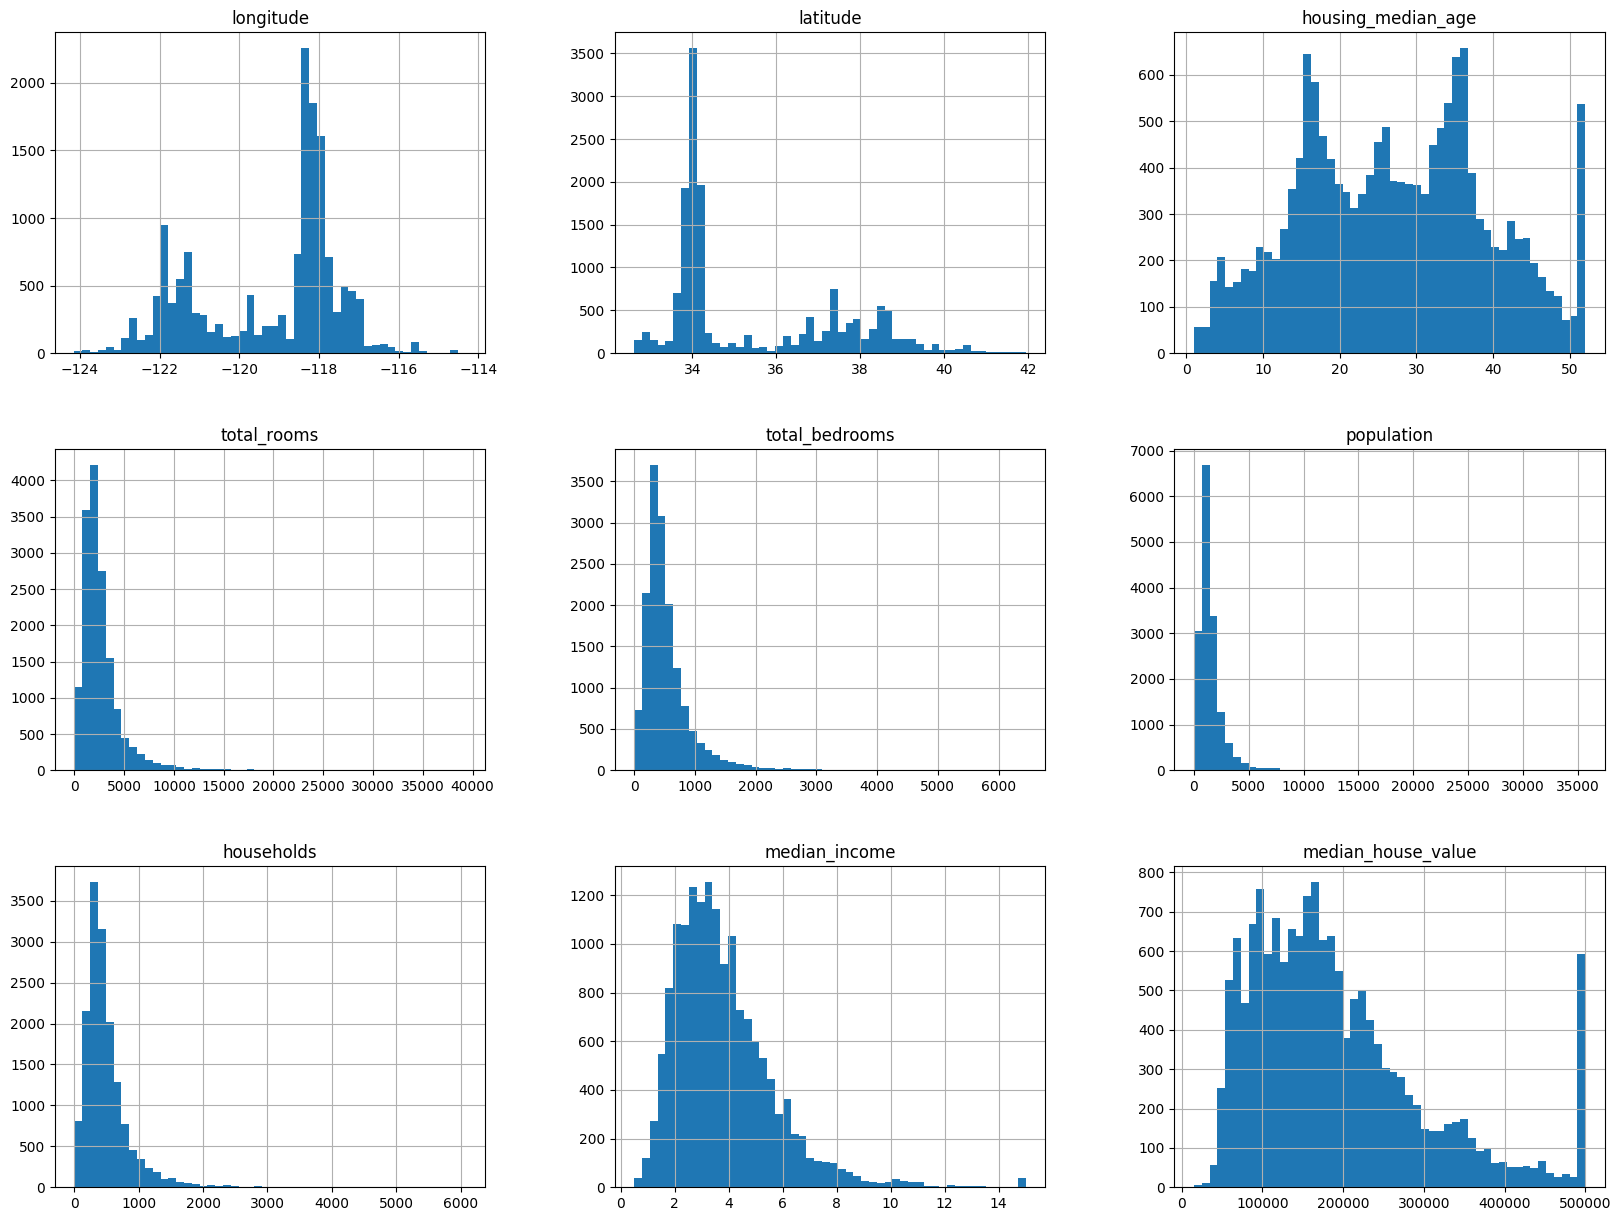

In [8]:
df.hist(bins = 50, figsize = (20, 15))

[Text(0.5, 0, 'Number of Bedrooms'),
 Text(0.5, 1.0, 'Histogram of Number of Bedrooms per Census Block')]

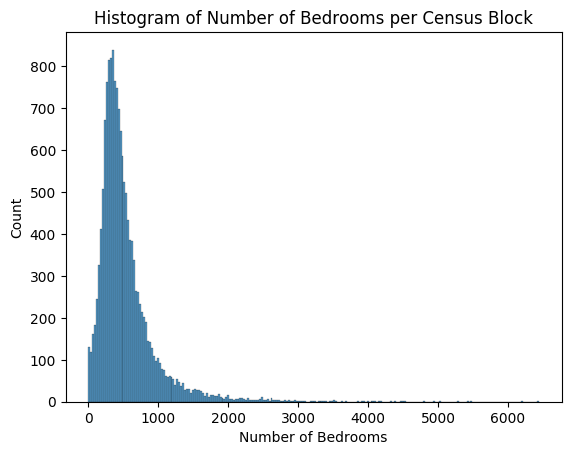

In [9]:
ax = sns.histplot(df.total_bedrooms)
ax.set(xlabel = 'Number of Bedrooms', title = 'Histogram of Number of Bedrooms per Census Block')

[Text(0.5, 0, 'Population Count'),
 Text(0.5, 1.0, 'Histogram of Population Count per Census Block')]

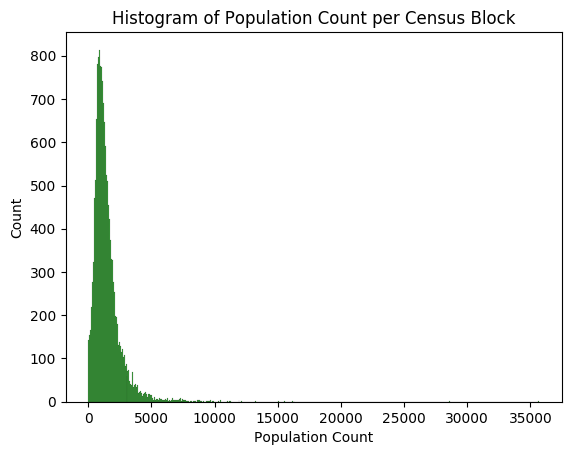

In [10]:
ax = sns.histplot(df.population, color='green')
ax.set(xlabel = 'Population Count', title = 'Histogram of Population Count per Census Block')

In [11]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

[Text(0.5, 0, 'Population Count'),
 Text(0.5, 1.0, 'Histogram of Population Count per Census Block')]

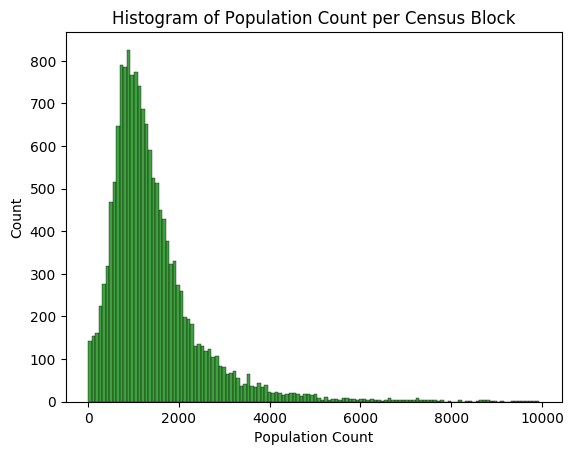

In [12]:
ax = sns.histplot(df.population[df.population < 10000], color='green')
ax.set(xlabel = 'Population Count', title = 'Histogram of Population Count per Census Block')

There is one case in which the population is `35682`. Let's look at it:

In [13]:
print('row for max value of population')
df[df.population == np.max(df.population)]

row for max value of population


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15360,-117.42,33.35,14.0,25135.0,4819.0,35682.0,4769.0,2.5729,134400.0


This row has the highest population count, while having a number of bedrooms in the top quartile and a median house value below average. It's most likely it includes apartments. The median income is alow in the lower quartile and the housing median age is also in the lower quartile, indicating that this could be a low-income area with many apartment buildings.

In [14]:
print('row for min value of median age')
df[df.housing_median_age == np.min(df.housing_median_age)]

row for min value of median age


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0
19536,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0


Above are rows in which the `housing median age` is smallest, 1 year old. This refers to the age of the building! (I originally thought it involved the age of those living there.) We see that the income is above average in these areas.

[Text(0.5, 1.0, 'Median Income by Census Block in California, 1990')]

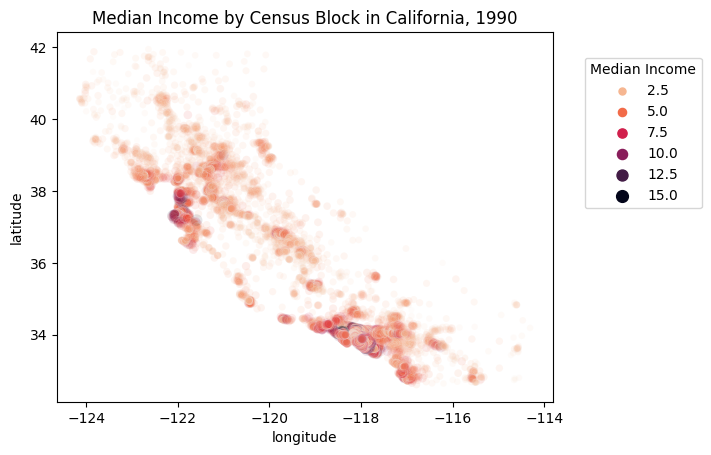

In [15]:
# longitude and latitude
ax = sns.scatterplot(
    data = df,
    x = "longitude",
    y = "latitude",
    size = "median_income",
    hue = "median_income",
    palette = "rocket_r",
    alpha = 0.1,
)
ax.legend(title = 'Median Income', bbox_to_anchor=(1.05, 0.95), loc="upper left")
ax.set(title = "Median Income by Census Block in California, 1990") 

### Median House Value (Y) and Pair Plots for Selected Covariates (X)

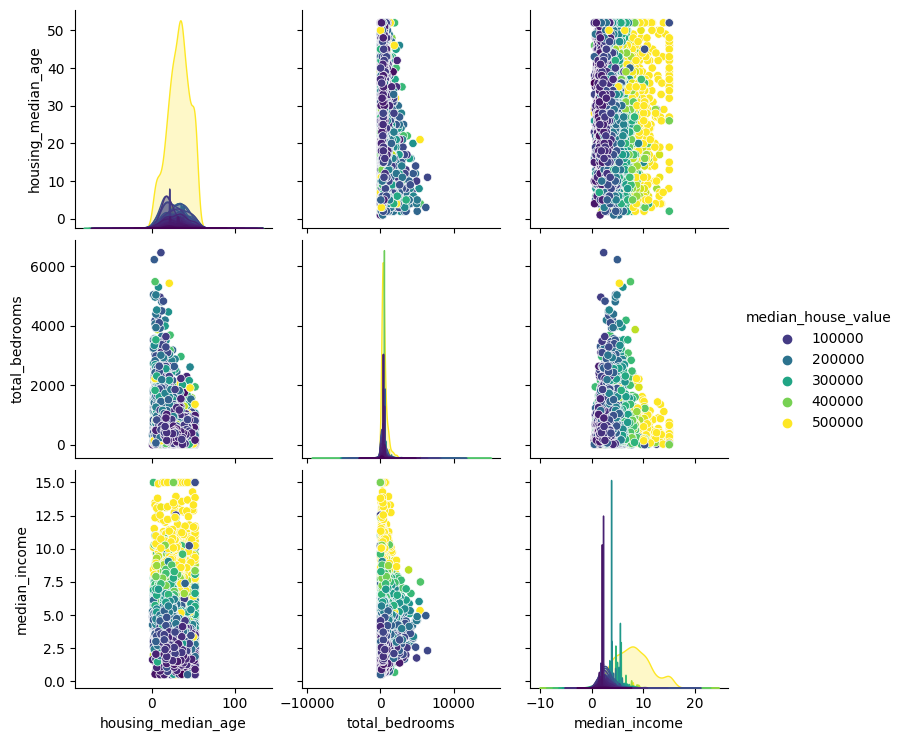

In [16]:
subset = df.drop(['latitude', 'longitude', 'total_rooms', 'population', 'households'], axis=1)
sns.pairplot(data = subset, hue = "median_house_value", palette = "viridis")

## Question 1

There's one feature with missing values. What is it?

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15687 non-null  float64
 1   latitude            15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.7 MB


We can see that:

- The dataset contains 15,687 samples and 9 features.

- All features are numerical features encoded as floating number.

- Total bedrooms has missing values because it containts 15,530 non-null values. Below we see that 1% is missing.

In [18]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.000829
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
dtype: float64

## Question 2

What's the median (50% percentile) for variable `'population'`?

In [19]:
df.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

In [20]:
np.median(df.population)

1195.0

## Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [21]:

# split data into training (60%), validating (20%), and test (20%) sets
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print('validation set: ' + str(n_val), 'test set: ' + str(n_test), 'training set: ' + str(n_train))

# suffle data with seed 42
np.random.seed(42)
idx = np.arange(n)
np.random.shuffle(idx)

# split the data
df_val = df.iloc[idx[:n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_val:n_val+n_test]].reset_index(drop=True)
df_train = df.iloc[idx[n_val+n_test:]].reset_index(drop=True)

validation set: 3137 test set: 3137 training set: 9413


In [22]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-121.37,38.62,43.0,1077.0,199.0,447.0,182.0,3.0139,115600.0
1,-117.66,34.13,17.0,3229.0,405.0,1289.0,407.0,6.3842,307100.0
2,-121.00,39.00,4.0,170.0,23.0,93.0,27.0,10.9891,312500.0
3,-117.17,34.03,33.0,4583.0,648.0,1760.0,638.0,6.3308,230600.0
4,-121.41,38.64,38.0,1384.0,287.0,682.0,280.0,1.9167,64400.0


In [23]:
# log transformation for median house value
y_train = np.log1p(df_train.median_house_value)
y_test = np.log1p(df_test.median_house_value)
y_val = np.log1p(df_val.median_house_value)

# remove y from data x
del df_train['median_house_value']
del df_test['median_house_value']
del df_val['median_house_value']

In [48]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-117.95,33.92,13.0,2312.0,592.0,2038.0,559.0,3.1378
1,-118.11,34.06,18.0,2609.0,721.0,2221.0,703.0,2.3224
2,-118.18,34.19,48.0,1371.0,NaN,528.0,155.0,15.0001
3,-117.78,33.81,23.0,1986.0,278.0,826.0,260.0,7.7752
4,-117.45,33.92,35.0,2552.0,588.0,1840.0,551.0,2.2548


In [24]:
len(y_train)

9413

In [25]:
len(df_train)

9413

## Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

In [26]:
# linear regression

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [27]:
# rsme 
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

### Imputation Missing with 0

In [28]:
def prepare_X(df):
    df_num = df#[base]
    # imputation
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [29]:
# imputation
X_train = prepare_X(df_train)

# linear regression, training set
w_0, w = train_linear_regression(X_train, y_train)

In [30]:
y_pred = w_0 + X_train.dot(w)

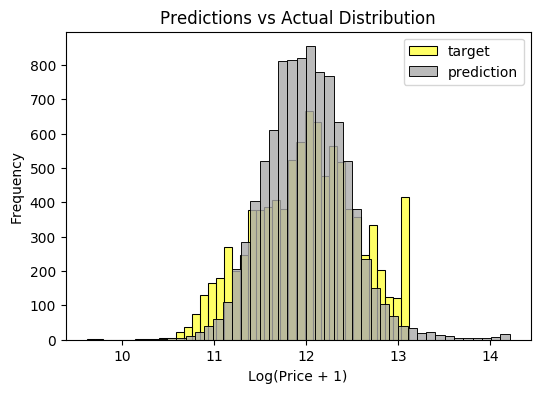

In [31]:
from matplotlib import pyplot as plt

plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='yellow', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()

In [32]:
# rsme 
print('RSME for observed Y (training set) and predicted Y')
round(rmse(y_train, y_pred), 2)

RSME for observed Y (training set) and predicted Y


0.34

In [33]:
# evaluate with validation set
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# rsme
print('RSME for observed Y (validation set) and predicted Y')
round(rmse(y_val, y_pred), 2)

RSME for observed Y (validation set) and predicted Y


0.34

### Mean Imputation

In [49]:
def prepare_X_mean(df):
    df_num = df
    # imputation
    df_num = df_num.fillna(np.mean(df_train.total_bedrooms))
    X = df_num.values
    return X

In [50]:
X_train = prepare_X_mean(df_train)

# linear regression, training set
w_0, w = train_linear_regression(X_train, y_train)

In [51]:
y_pred = w_0 + X_train.dot(w)

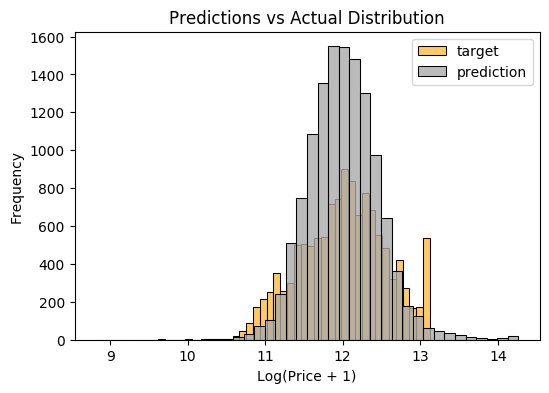

In [52]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='orange', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs Actual Distribution')

plt.show()

In [53]:
# rsme 
print('RSME for observed Y (training set) and predicted Y')
round(rmse(y_train, y_pred), 2)

RSME for observed Y (training set) and predicted Y


0.34

In [54]:
X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

# rsme
print('RSME for observed Y (validation set) and predicted Y')
round(rmse(y_val, y_pred), 2)

RSME for observed Y (validation set) and predicted Y


0.35

## Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

In [40]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [41]:
# prepare X and impute 0 for missingness
X_train = prepare_X(df_train)

In [60]:
# different r for regularization
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_train.dot(w)
    print('train for r:' + str(r), rmse(y_train, y_pred))
    #print(w_0, w)

train for r:0 0.33611847714584236
train for r:1e-06 0.3361184771458763
train for r:0.0001 0.33611847748572726
train for r:0.001 0.3361185110055186
train for r:0.01 0.33612173822663305
train for r:0.1 0.3363501907532386
train for r:1 0.33961192495700515
train for r:5 0.3424219554497404
train for r:10 0.342999022973143


In [61]:
# r = 0 is best
0.33611847714584236 < 0.3361184771458763

True

In [62]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.000001)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('val', round(rmse(y_val, y_pred), 2))

train 0.34
val 0.35


## Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

What's the value of std?

In [69]:
# splitting the data with different seeds 
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

rmse_vals = []

for seed in seeds: 
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    # split the data
    df_val = df.iloc[idx[:n_val]].reset_index(drop=True)
    df_test = df.iloc[idx[n_val:n_val+n_test]].reset_index(drop=True)
    df_train = df.iloc[idx[n_val+n_test:]].reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    y_val = np.log1p(df_val.median_house_value)

    # remove y from data x
    del df_train['median_house_value']
    del df_test['median_house_value']
    del df_val['median_house_value']
    X_train = prepare_X(df_train)

    # linear regression, training set
    w_0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    rmse_vals.append(rmse_val)

In [70]:
rmse_seeds = {seeds[i]: rmse_vals[i] for i in range(len(seeds))}
rmse_seeds

{0: 0.3278645976340476,
 1: 0.33891483153436724,
 2: 0.3531137898425363,
 3: 0.3411878083623426,
 4: 0.3452209375730307,
 5: 0.3370009381951425,
 6: 0.3323265932584698,
 7: 0.33092792671116983,
 8: 0.3286897318677118,
 9: 0.346249035093437}

In [71]:
# std of rmse
round(np.std(rmse_vals), 3)

0.008

## Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [73]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

# split the data into train (train + validation) and test
df_test = df.iloc[idx[:n_test]].reset_index(drop=True)
df_train = df.iloc[idx[n_test:]].reset_index(drop=True)
y_train = np.log1p(df_train.median_house_value)
y_test = np.log1p(df_test.median_house_value)

# remove y from data x
del df_train['median_house_value']
del df_test['median_house_value']

# prepare data
X_train = prepare_X(df_train)

# regularization
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))

# test data
X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test', round(rmse(y_test, y_pred), 2))

train 0.34
test 0.35
